In [1]:
import numpy as np 
import pandas as pd 
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('online_retail.csv', index_col=False)

In [3]:
data.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [5]:
for x in data.columns: 
    print(x)
    print(data[x].values)

index
[     0      1      2 ... 541906 541907 541908]
InvoiceNo
['536365' '536365' '536365' ... '581587' '581587' '581587']
StockCode
['85123A' '71053' '84406B' ... '23254' '23255' '22138']
Description
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'CHILDRENS CUTLERY DOLLY GIRL '
 'CHILDRENS CUTLERY CIRCUS PARADE' 'BAKING SET 9 PIECE RETROSPOT ']
Quantity
[6 6 8 ... 4 4 3]
InvoiceDate
['12/1/2010 8:26' '12/1/2010 8:26' '12/1/2010 8:26' ... '12/9/2011 12:50'
 '12/9/2011 12:50' '12/9/2011 12:50']
UnitPrice
[2.55 3.39 2.75 ... 4.15 4.15 4.95]
CustomerID
[17850. 17850. 17850. ... 12680. 12680. 12680.]
Country
['United Kingdom' 'United Kingdom' 'United Kingdom' ... 'France' 'France'
 'France']


In [6]:
df = data.copy()

In [7]:
df = df.drop(columns='index')

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df= df.dropna(subset=['CustomerID'])

In [10]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
print(df.duplicated().sum())

5225


In [12]:
df = df.drop_duplicates()

In [13]:
print(df.duplicated().sum())

0


In [14]:
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [15]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [16]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,401604.000000,401604,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064
min,-80995.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000
50%,5.000000,2011-07-29 15:40:00,1.950000
75%,12.000000,2011-10-20 11:58:30,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,250.283037,NaN,69.764035


In [17]:
df.shape

(401604, 8)

In [18]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [19]:
df[df['StockCode'].str.len() == 1][['StockCode','Description']].value_counts()

StockCode  Description
M          Manual         460
D          Discount        77
Name: count, dtype: int64

In [20]:
df[(df['Quantity']<0) & (df['InvoiceNo'] == 'C536379')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.5,14527,United Kingdom


In [21]:
df[(df['Quantity']<0) & (df['Description'] == 'Discount')][['StockCode','Description']].value_counts()

StockCode  Description
D          Discount       77
Name: count, dtype: int64

In [22]:
df[df['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410,United Kingdom


In [23]:
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]

In [24]:
df.shape

(392692, 8)

In [25]:
df.to_csv('online_retail_preprocessed.csv', index=False)

In [26]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,392692.000000,392692,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914
min,1.000000,2010-12-01 08:26:00,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000
50%,6.000000,2011-07-31 12:02:00,1.950000
75%,12.000000,2011-10-20 12:53:00,3.750000
max,80995.000000,2011-12-09 12:50:00,8142.750000
std,180.492832,NaN,22.241836


In [27]:
df['CustomerID']

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541904    12680
541905    12680
541906    12680
541907    12680
541908    12680
Name: CustomerID, Length: 392692, dtype: object

In [28]:
print(f"Number of unique invoices: {df['InvoiceNo'].nunique()}")
print(f"Number of unique products: {df['StockCode'].nunique()}")
print(f"Number of unique descriptions: {df['Description'].nunique()}")

Number of unique invoices: 18532
Number of unique products: 3665
Number of unique descriptions: 3877


In [29]:
print(f"Most common products:\n{df['Description'].value_counts().head(10)}")

Most common products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1713
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1389
LUNCH BAG RED RETROSPOT               1303
SET OF 3 CAKE TINS PANTRY DESIGN      1152
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1078
PACK OF 72 RETROSPOT CAKE CASES       1050
Name: count, dtype: int64


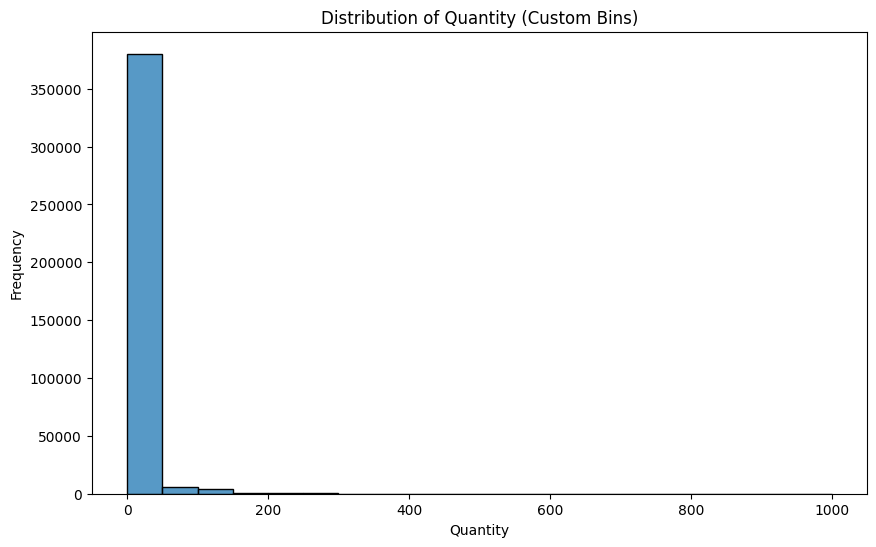

In [30]:
# Define custom bin ranges
bin_ranges = list(range(0, 1001, 50))  # Bins from 0 to 1000 in increments of 50

# Plot histogram with custom bins
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=bin_ranges, kde=False)
plt.title('Distribution of Quantity (Custom Bins)')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

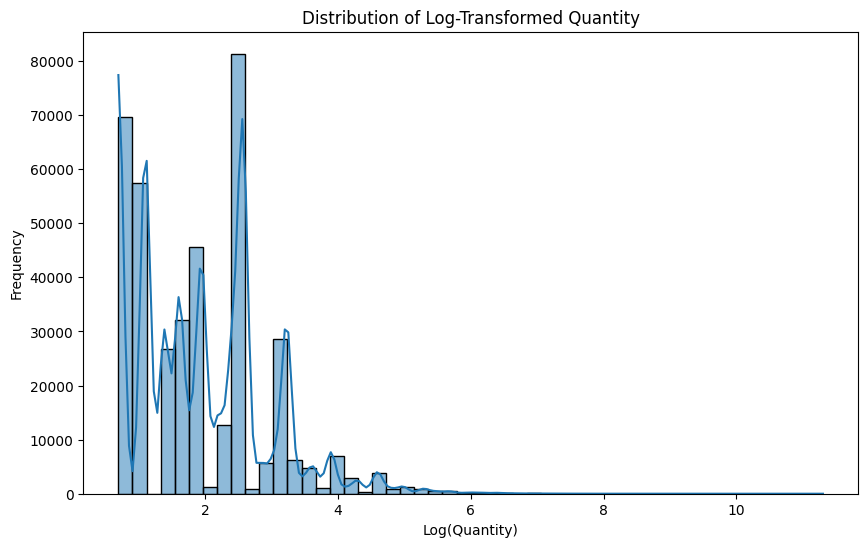

In [31]:
# Apply log transformation to Quantity
df['Log_Quantity'] = df['Quantity'].apply(lambda x: np.log1p(x) if x > 0 else 0)

# Plot histogram of log-transformed data
plt.figure(figsize=(10, 6))
sns.histplot(df['Log_Quantity'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Quantity')
plt.xlabel('Log(Quantity)')
plt.ylabel('Frequency')
plt.show()

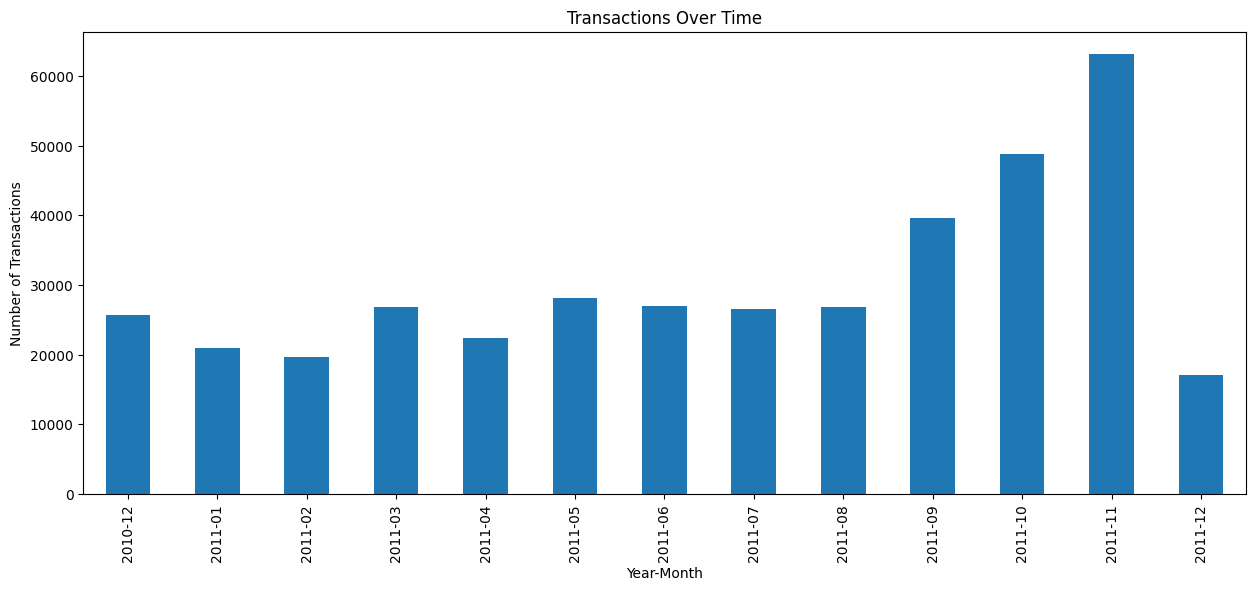

In [32]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

plt.figure(figsize=(15, 6))
df['YearMonth'].value_counts().sort_index().plot(kind='bar')
plt.title('Transactions Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.show()


Country Analysis:
Number of unique countries: 37
Top 10 countries by transactions:
Country
United Kingdom    349203
Germany             9025
France              8326
EIRE                7226
Spain               2479
Netherlands         2359
Belgium             2031
Switzerland         1841
Portugal            1453
Australia           1181
Name: count, dtype: int64


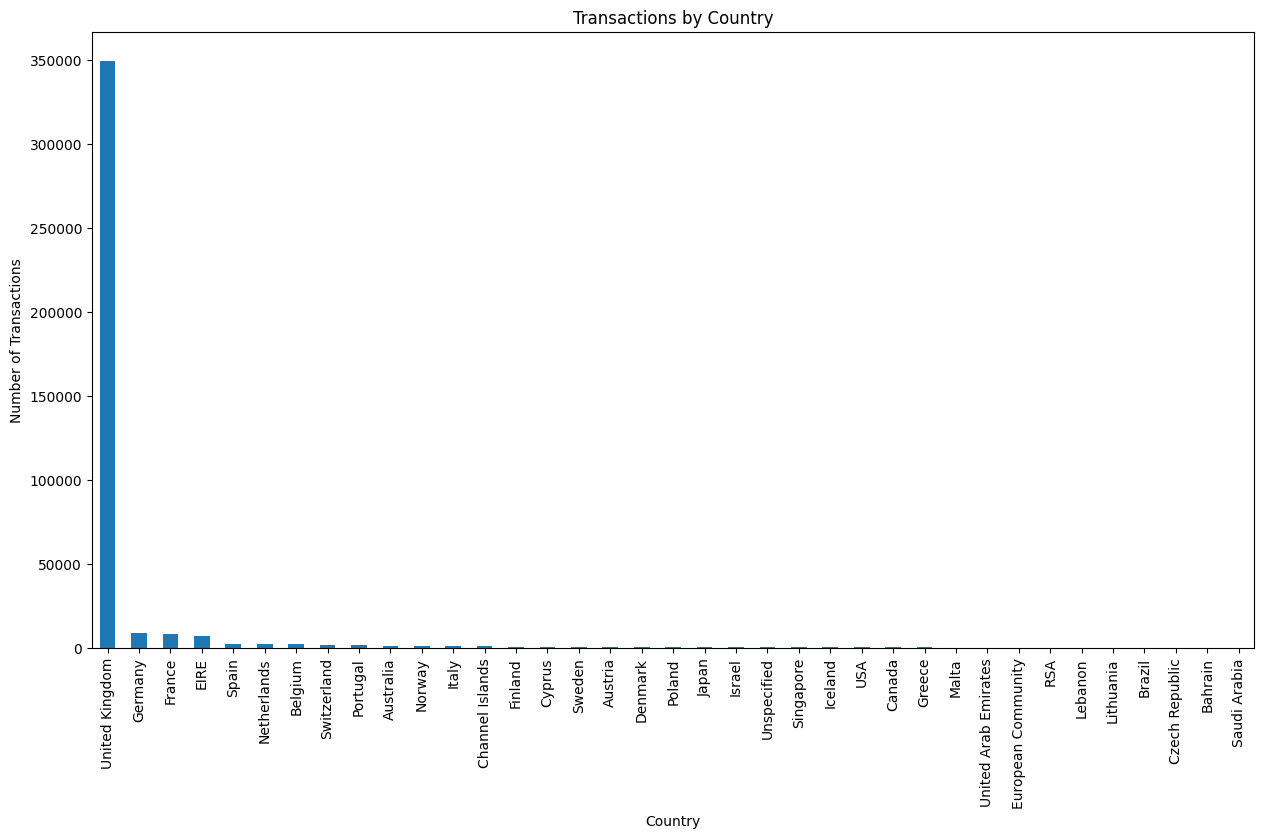

In [33]:
print("\nCountry Analysis:")
print(f"Number of unique countries: {df['Country'].nunique()}")
print(f"Top 10 countries by transactions:\n{df['Country'].value_counts().head(10)}")

# Transactions by country
plt.figure(figsize=(15, 8))
df['Country'].value_counts().plot(kind='bar')
plt.title('Transactions by Country')
plt.ylabel('Number of Transactions')
plt.show()

In [34]:
df1 = df.copy()

In [35]:
### Get Month
df1['InvoiceMonth'] = df1['InvoiceDate'].dt.date

In [36]:
df1.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Quantity,YearMonth,InvoiceMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2.564949,2011-12,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,1.945910,2011-12,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,1.609438,2011-12,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,1.609438,2011-12,2011-12-09
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,1.386294,2011-12,2011-12-09


In [37]:
### Get Cohort Month
df1['FirstOrderDate'] = df1.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [38]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Quantity,YearMonth,InvoiceMonth,FirstOrderDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,1.945910,2010-12,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.945910,2010-12,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2.197225,2010-12,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.945910,2010-12,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.945910,2010-12,2010-12-01,2010-12-01


In [39]:
df1.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Quantity,YearMonth,InvoiceMonth,FirstOrderDate
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2.564949,2011-12,2011-12-09,2011-08-18
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,1.945910,2011-12,2011-12-09,2011-08-18
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,1.609438,2011-12,2011-12-09,2011-08-18
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,1.609438,2011-12,2011-12-09,2011-08-18
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,1.386294,2011-12,2011-12-09,2011-08-18


In [40]:
## Check value 
df1[df1['CustomerID'] == '12680'][['InvoiceMonth', 'FirstOrderDate']].value_counts()

InvoiceMonth  FirstOrderDate
2011-08-18    2011-08-18        20
2011-12-09    2011-08-18        15
2011-09-27    2011-08-18        10
2011-09-11    2011-08-18         7
Name: count, dtype: int64

In [41]:
df1[df1['CustomerID'] == '17850'][['InvoiceMonth', 'FirstOrderDate']].value_counts()

InvoiceMonth  FirstOrderDate
2010-12-02    2010-12-01        213
2010-12-01    2010-12-01         84
Name: count, dtype: int64

In [42]:
df1.dtypes

InvoiceNo                 object
StockCode                 object
Description               object
Quantity                   int64
InvoiceDate       datetime64[ns]
UnitPrice                float64
CustomerID                object
Country                   object
Log_Quantity             float64
YearMonth              period[M]
InvoiceMonth              object
FirstOrderDate            object
dtype: object

In [43]:
### Change FirstOrderDate to dataframe dtype
df1['InvoiceMonth'] = pd.to_datetime(df1['InvoiceMonth'])
df1['FirstOrderDate'] = pd.to_datetime(df1['FirstOrderDate'])
# 월의 첫째날 가져오기 
df1['InvoiceMonth'] = df1['InvoiceDate'].dt.to_period('M').dt.to_timestamp()
df1['FirstOrderDate'] = df1['FirstOrderDate'].dt.to_period('M').dt.to_timestamp()

In [44]:
df1.dtypes

InvoiceNo                 object
StockCode                 object
Description               object
Quantity                   int64
InvoiceDate       datetime64[ns]
UnitPrice                float64
CustomerID                object
Country                   object
Log_Quantity             float64
YearMonth              period[M]
InvoiceMonth      datetime64[ns]
FirstOrderDate    datetime64[ns]
dtype: object

In [45]:
df1['FirstOrderDate'].value_counts()

FirstOrderDate
2010-12-01    167209
2011-01-01     47144
2011-03-01     33929
2011-02-01     30156
2011-04-01     19025
2011-10-01     15868
2011-05-01     15474
2011-09-01     14031
2011-06-01     13668
2011-08-01     12940
2011-11-01     11921
2011-07-01     10366
2011-12-01       961
Name: count, dtype: int64

In [46]:
df1[['FirstOrderDate']].value_counts()

FirstOrderDate
2010-12-01        167209
2011-01-01         47144
2011-03-01         33929
2011-02-01         30156
2011-04-01         19025
2011-10-01         15868
2011-05-01         15474
2011-09-01         14031
2011-06-01         13668
2011-08-01         12940
2011-11-01         11921
2011-07-01         10366
2011-12-01           961
Name: count, dtype: int64

In [47]:
df1[df1['FirstOrderDate'] == '2011-01-01'][['FirstOrderDate','InvoiceMonth']].value_counts()

FirstOrderDate  InvoiceMonth
2011-01-01      2011-01-01      10877
                2011-11-01       6248
                2011-10-01       4987
                2011-09-01       3768
                2011-05-01       3603
                2011-06-01       3214
                2011-03-01       3012
                2011-08-01       2844
                2011-07-01       2776
                2011-04-01       2290
                2011-02-01       2191
                2011-12-01       1334
Name: count, dtype: int64

In [48]:
df1['CohortIndex'] = (
    (df1['InvoiceMonth'].dt.year - df1['FirstOrderDate'].dt.year) * 12 +
    (df1['InvoiceMonth'].dt.month - df1['FirstOrderDate'].dt.month) #+ 1
)

In [49]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Quantity,YearMonth,InvoiceMonth,FirstOrderDate,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,1.945910,2010-12,2010-12-01,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.945910,2010-12,2010-12-01,2010-12-01,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2.197225,2010-12,2010-12-01,2010-12-01,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.945910,2010-12,2010-12-01,2010-12-01,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.945910,2010-12,2010-12-01,2010-12-01,0


In [50]:
df1[df1['CustomerID'] == '12680'][['InvoiceMonth', 'FirstOrderDate','CohortIndex']]

,InvoiceMonth,FirstOrderDate,CohortIndex
305779,2011-08-01,2011-08-01,0
305780,2011-08-01,2011-08-01,0
305781,2011-08-01,2011-08-01,0
305782,2011-08-01,2011-08-01,0
305783,2011-08-01,2011-08-01,0
305784,2011-08-01,2011-08-01,0
305785,2011-08-01,2011-08-01,0
305786,2011-08-01,2011-08-01,0
305787,2011-08-01,2011-08-01,0
305788,2011-08-01,2011-08-01,0


In [51]:
df1.describe()

,Quantity,InvoiceDate,UnitPrice,Log_Quantity,InvoiceMonth,FirstOrderDate,CohortIndex
count,392692.000000,392692,392692.000000,392692.000000,392692,392692,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,1.929854,2011-06-26 04:55:07.630407680,2011-02-20 03:31:01.477188096,4.147599
min,1.000000,2010-12-01 08:26:00,0.001000,0.693147,2010-12-01 00:00:00,2010-12-01 00:00:00,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,1.098612,2011-04-01 00:00:00,2010-12-01 00:00:00,0.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,1.945910,2011-07-01 00:00:00,2011-01-01 00:00:00,3.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,2.564949,2011-10-01 00:00:00,2011-04-01 00:00:00,7.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,11.302155,2011-12-01 00:00:00,2011-12-01 00:00:00,12.000000
std,180.492832,NaN,22.241836,1.000779,NaN,NaN,3.850198


In [52]:
cohort_counts = (
    df1.groupby(['FirstOrderDate', 'CohortIndex'])['CustomerID']
    .nunique() #각 그룹의 고유 고객 수(CustomerID)를 직접 계산)
    .unstack() #Reshapes the grouped data into a pivot table
)
cohort_counts

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstOrderDate,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


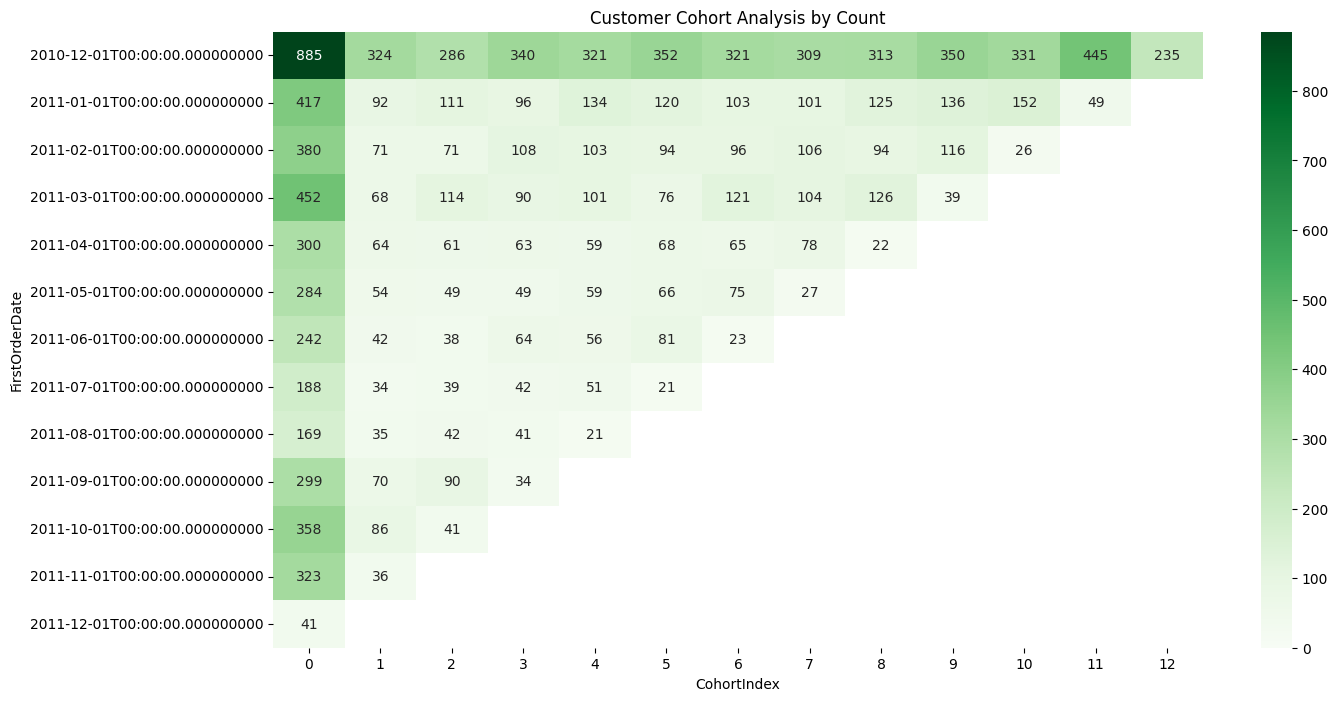

In [53]:
#1
plt.figure(figsize=(15, 8))
plt.title('Customer Cohort Analysis by Count')
sns.heatmap(data=cohort_counts,annot = True,vmin = 0.0,fmt=".0f",cmap="Greens")
plt.show()

In [54]:
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 
retention.round(3) * 100 #백분율 표시

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstOrderDate,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
cohort_size

FirstOrderDate
2010-12-01    885.0
2011-01-01    417.0
2011-02-01    380.0
2011-03-01    452.0
2011-04-01    300.0
2011-05-01    284.0
2011-06-01    242.0
2011-07-01    188.0
2011-08-01    169.0
2011-09-01    299.0
2011-10-01    358.0
2011-11-01    323.0
2011-12-01     41.0
Name: 0, dtype: float64

In [56]:
324/885

0.36610169491525424

In [57]:
286.0/885

0.3231638418079096

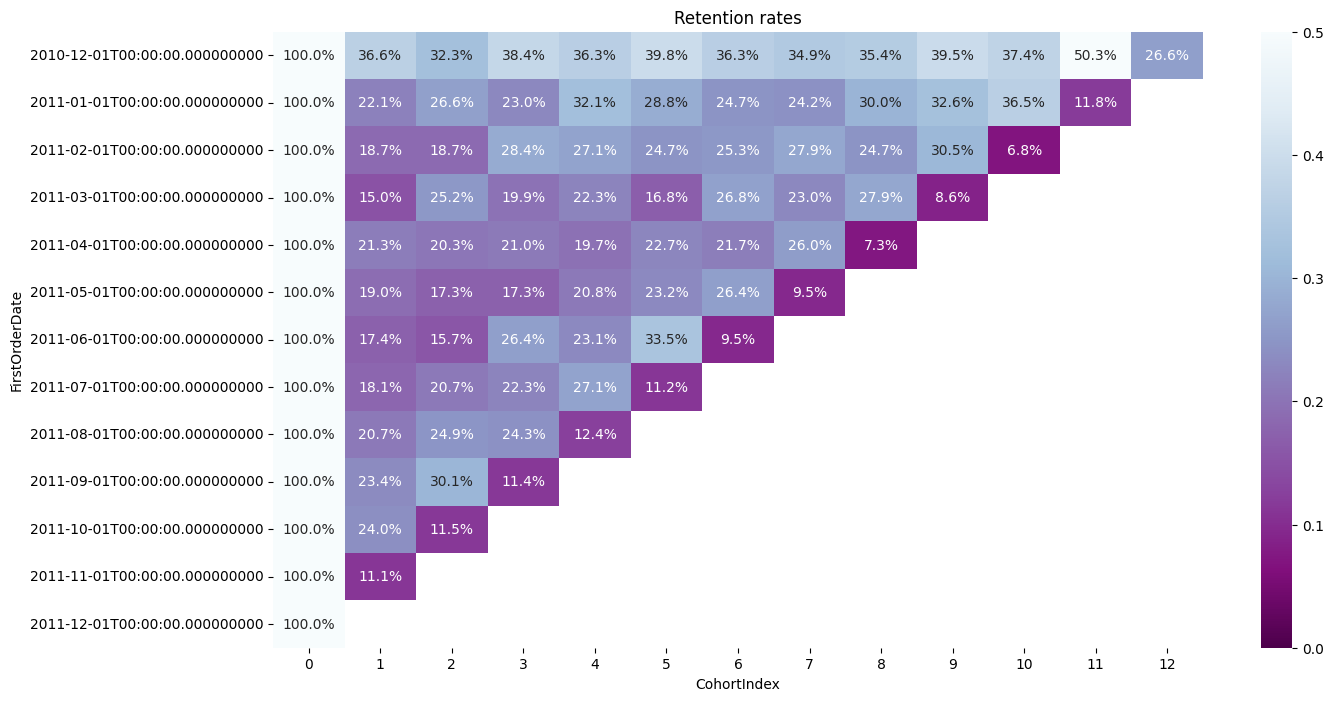

In [58]:
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.1%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()

In [59]:
average_quantity = (
    df1.groupby(['FirstOrderDate', 'CohortIndex'])['Quantity']
    .mean()
    .unstack()
    .round(1)
)

In [60]:
average_quantity

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstOrderDate,,,,,,,,,,,,,
2010-12-01,12.1,15.7,15.7,15.9,13.6,14.9,16.1,15.6,18.2,17.7,19.0,13.6,15.4
2011-01-01,17.5,13.5,12.7,15.3,12.8,15.4,15.0,15.0,11.6,10.6,9.6,10.2,NaN
2011-02-01,11.2,13.7,19.0,12.0,12.3,12.3,13.6,13.4,11.0,12.4,13.4,NaN,NaN
2011-03-01,10.0,11.7,13.3,10.1,13.8,13.0,13.5,13.9,11.3,9.7,NaN,NaN,NaN
2011-04-01,10.0,10.4,9.8,11.9,12.0,8.7,10.0,9.7,7.6,NaN,NaN,NaN,NaN
2011-05-01,11.5,9.7,14.2,12.8,11.2,8.8,10.8,113.8,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.7,14.7,10.9,13.7,10.7,10.0,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.9,13.8,7.4,8.2,6.2,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.1,6.2,5.4,6.2,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


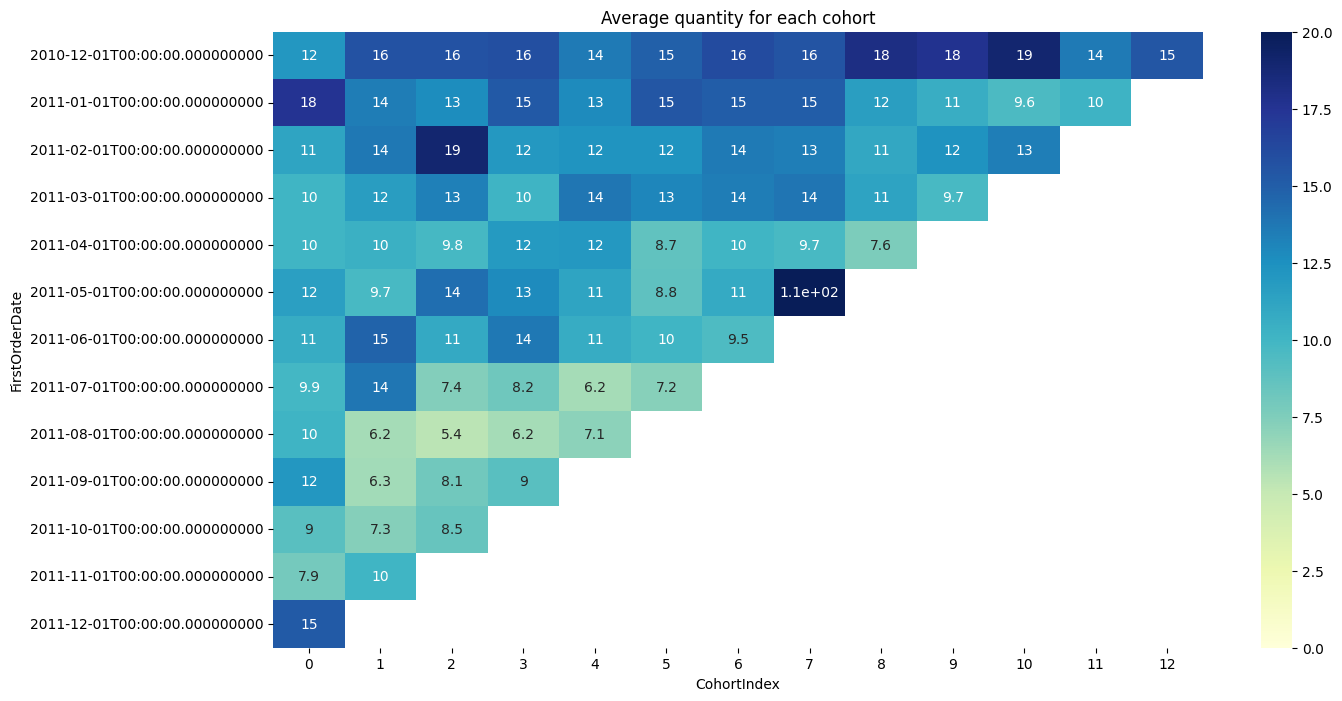

In [64]:
#2
plt.figure(figsize=(15, 8))
plt.title('Average quantity for each cohort')
sns.heatmap(data=average_quantity,annot = True,vmin = 0.0,vmax =20,cmap='YlGnBu')
plt.show()

In [65]:
df1['Sales'] = df1['Quantity'] * df1['UnitPrice']

In [66]:
cohort_revenue = (
    df1.groupby(['FirstOrderDate', 'CohortIndex'])['Sales'].sum()
    .unstack() #Reshapes the grouped data into a pivot table
)
cohort_revenue

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstOrderDate,,,,,,,,,,,,,
2010-12-01,570422.730,275734.47,233390.47,302367.44,204034.38,336113.69,313668.16,310304.03,331001.070,471792.13,455478.90,512341.08,185360.97
2011-01-01,292366.840,54993.86,63157.01,71526.09,80989.77,84464.57,70073.35,72503.42,71870.481,111370.70,123252.86,26388.03,NaN
2011-02-01,157700.590,28937.64,40964.47,48155.39,40089.17,34155.67,49673.71,62292.80,55241.340,64688.86,10600.22,NaN,NaN
2011-03-01,199619.670,30040.34,58958.41,42739.08,51392.44,39962.33,64824.15,70523.62,70847.620,12761.10,NaN,NaN,NaN
2011-04-01,121809.051,29398.59,25028.57,24282.79,26253.16,30103.24,28505.90,34009.61,6332.000,NaN,NaN,NaN,NaN
2011-05-01,123739.300,18641.70,20155.73,19162.17,27752.62,32875.34,33168.34,179184.23,NaN,NaN,NaN,NaN,NaN
2011-06-01,135414.800,14738.49,14104.37,30898.56,26669.90,42531.09,8143.22,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,73860.401,11789.67,15488.37,17391.93,19156.82,6040.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,79601.140,20933.76,35458.48,44487.65,15284.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


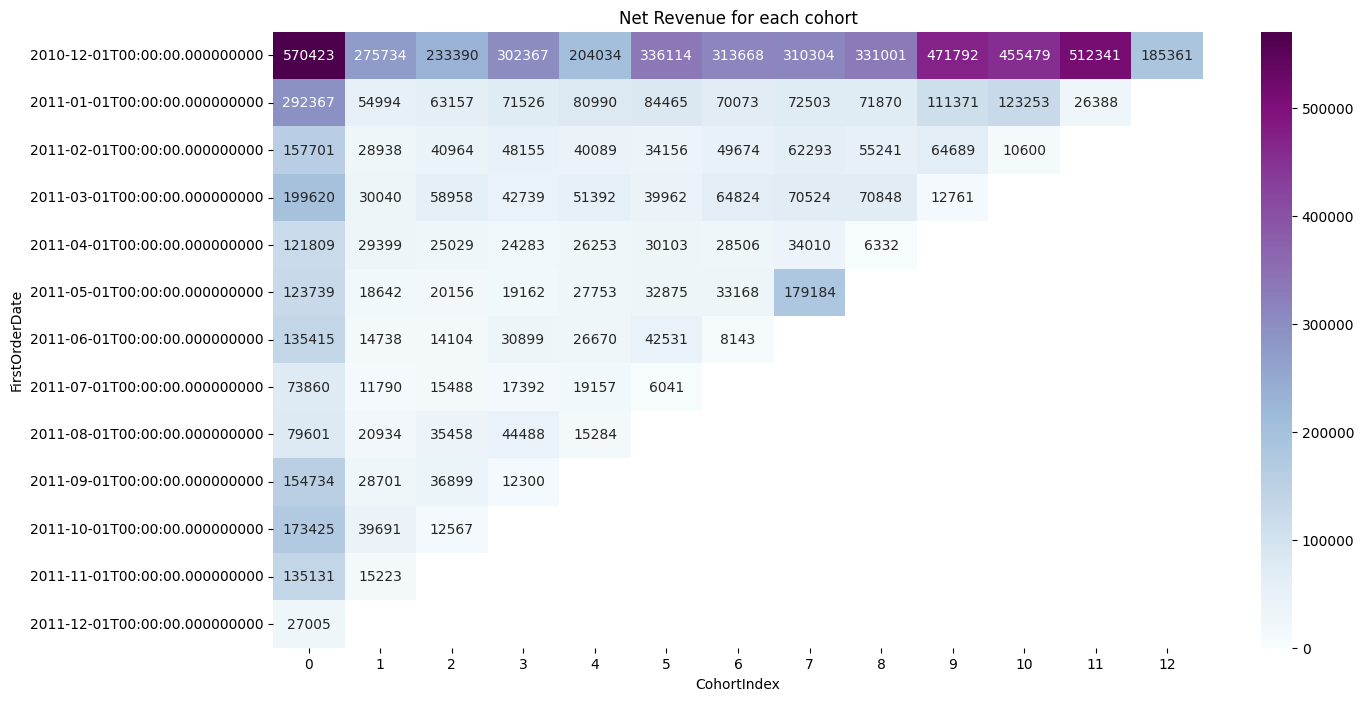

In [67]:
plt.figure(figsize=(15, 8))
plt.title('Net Revenue for each cohort')
sns.heatmap(data=cohort_revenue,annot = True,vmin = 0.0,fmt=".0f",cmap="BuPu")
plt.show()

In [68]:
cohort_cumulative_revenue = (
    df1.groupby(['FirstOrderDate', 'CohortIndex'])['Sales'].sum()
    .unstack()  # Reshapes the grouped data into a pivot table
    .cumsum(axis=1)  # Calculates the cumulative sum across columns (CohortIndex)
)
cohort_cumulative_revenue

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstOrderDate,,,,,,,,,,,,,
2010-12-01,570422.730,846157.200,1079547.670,1381915.110,1585949.490,1922063.180,2235731.340,2546035.370,2877036.440,3348828.570,3804307.470,4316648.550,4502009.52
2011-01-01,292366.840,347360.700,410517.710,482043.800,563033.570,647498.140,717571.490,790074.910,861945.391,973316.091,1096568.951,1122956.981,NaN
2011-02-01,157700.590,186638.230,227602.700,275758.090,315847.260,350002.930,399676.640,461969.440,517210.780,581899.640,592499.860,NaN,NaN
2011-03-01,199619.670,229660.010,288618.420,331357.500,382749.940,422712.270,487536.420,558060.040,628907.660,641668.760,NaN,NaN,NaN
2011-04-01,121809.051,151207.641,176236.211,200519.001,226772.161,256875.401,285381.301,319390.911,325722.911,NaN,NaN,NaN,NaN
2011-05-01,123739.300,142381.000,162536.730,181698.900,209451.520,242326.860,275495.200,454679.430,NaN,NaN,NaN,NaN,NaN
2011-06-01,135414.800,150153.290,164257.660,195156.220,221826.120,264357.210,272500.430,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,73860.401,85650.071,101138.441,118530.371,137687.191,143727.891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,79601.140,100534.900,135993.380,180481.030,195765.390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


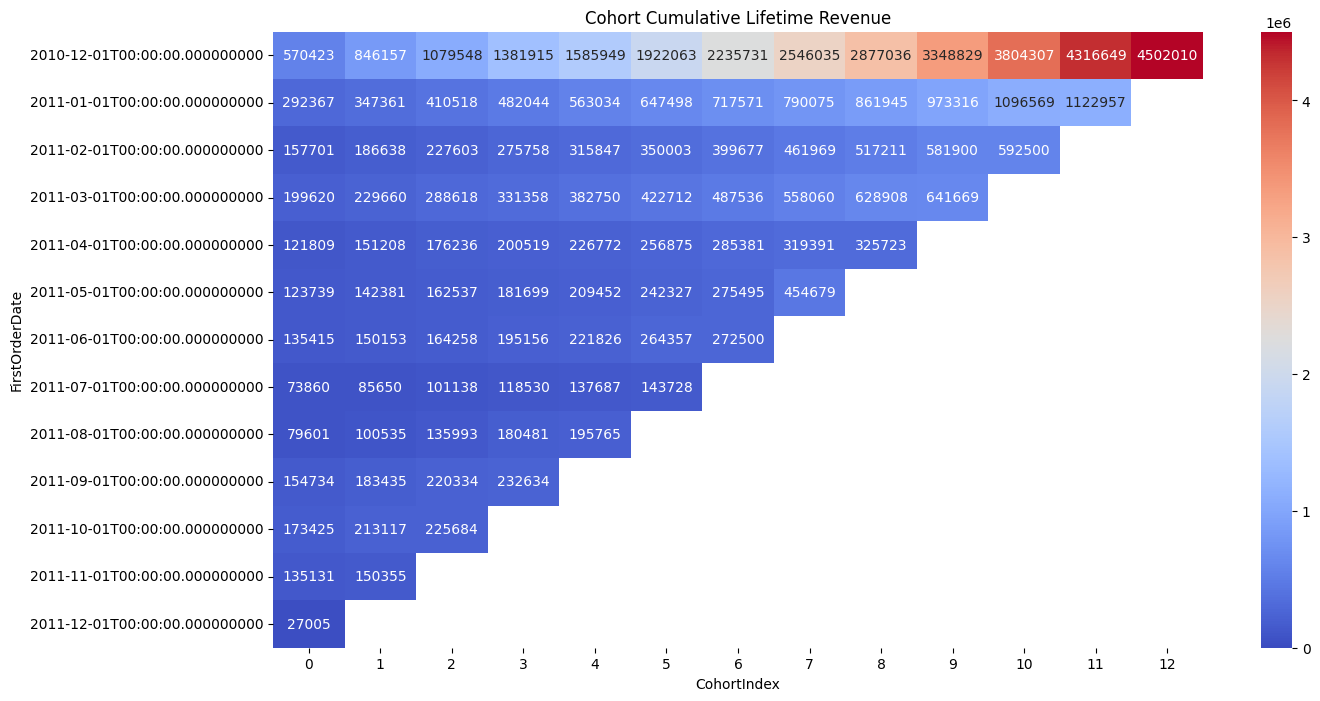

In [69]:
#3
plt.figure(figsize=(15, 8))
plt.title('Cohort Cumulative Lifetime Revenue')
sns.heatmap(data=cohort_cumulative_revenue,annot = True,vmin = 0.0,fmt=".0f",cmap="coolwarm")
plt.show()